In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,losses,metrics
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Data Loading, Preprocessing (Data Preparation)

In [3]:
import tensorflow_datasets as tfds

# Load the CIFAR-10 dataset
dataset, info = tfds.load("cifar10", split="train", as_supervised=True, with_info=True)

# Split the training set into validation and training sets
validation_percentage = 10  # Percentage of data to use for validation
num_validation_samples = int(len(dataset) * (validation_percentage / 100.0))

train_set = dataset.skip(num_validation_samples)
valid_set = dataset.take(num_validation_samples)

# Load the test set
test_set = tfds.load("cifar10", split="test", as_supervised=True)

# Print the number of samples in each set
print("Train Set Size:", len(train_set))
print("Validation Set Size:", len(valid_set))
print("Test Set Size:", len(test_set))

# Extract the labels from the dataset
train_labels = [label for _, label in train_set]
valid_labels = [label for _, label in valid_set]
test_labels = [label for _, label in test_set]

# Print the number of labels in each set
print("Train Labels Size:", len(train_labels))
print("Validation Labels Size:", len(valid_labels))
print("Test Labels Size:", len(test_labels))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteWR72CQ/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteWR72CQ/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Train Set Size: 45000
Validation Set Size: 5000
Test Set Size: 10000
Train Labels Size: 45000
Validation Labels Size: 5000
Test Labels Size: 10000


In [4]:
train_images = [image for image,_ in train_set]
valid_images = [image for image,_ in valid_set]
test_images = [image for image,_ in test_set]

In [5]:
print("Train Images Size:", len(train_images))
print("Validation Images Size:", len(valid_images))
print("Test Images Size:", len(test_images))

Train Images Size: 45000
Validation Images Size: 5000
Test Images Size: 10000


In [6]:
import numpy as np
train_images=np.array(train_images
                       )
valid_images=np.array(valid_images
                       )
test_images=np.array(test_images
                       )

In [7]:
train_images,valid_images,test_images=train_images.astype('float32')/255.0,valid_images.astype('float32')/255.0,test_images.astype('float32')/255.0

In [8]:
train_labels=np.array(train_labels
                       )
valid_labels=np.array(valid_labels
                       )
test_labels=np.array(test_labels
                       )

In [9]:
train_b1,train_b2,train_b3,train_b4,train_b5=train_images[0:9000],train_images[9000:18000],train_images[18000:27000],train_images[27000:36000],train_images[36000:]
print(train_b1.shape)
print(train_b2.shape)
print(train_b3.shape)
print(train_b4.shape)
print(train_b5.shape)


(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)
(9000, 32, 32, 3)


In [10]:
train_l1,train_l2,train_l3,train_l4,train_l5=train_labels[0:9000],train_labels[9000:18000],train_labels[18000:27000],train_labels[27000:36000],train_labels[36000:]
print(train_l1.shape)
print(train_l2.shape)
print(train_l3.shape)
print(train_l4.shape)
print(train_l5.shape)

(9000,)
(9000,)
(9000,)
(9000,)
(9000,)


In [11]:
classes1,classes2,classes3,classes4,classes5 = train_l1,train_l2,train_l3,train_l4,train_l5
numberofclasses = 10
onehotencb1 = tf.one_hot(classes1,numberofclasses)
onehotencb2 = tf.one_hot(classes2,numberofclasses)
onehotencb3 = tf.one_hot(classes3,numberofclasses)
onehotencb4 = tf.one_hot(classes4,numberofclasses)
onehotencb5 = tf.one_hot(classes5,numberofclasses)


In [12]:
from keras.engine.sequential import Sequential
final_labels_encoded=np.concatenate((onehotencb1,onehotencb2,onehotencb3,onehotencb4,onehotencb5))
valid_lfinal=tf.one_hot(valid_labels,numberofclasses)
test_labels_f=tf.one_hot(test_labels,numberofclasses)

# Exploratory Data Analysis
## Data Summary

In [13]:
labellist={0:"Airplane",1:"Automobile",2:"Bird",3:"Cat",4:"Deer",5:"Dog",6:"Frog",7:"Horse",8:"Ship",9:"Truck"}
def summary(labelarray,imagearray):
  c0=len(np.where(labelarray==0)[0])
  c1=len(np.where(labelarray==1)[0])
  c2=len(np.where(labelarray==2)[0])
  c3=len(np.where(labelarray==3)[0])
  c4=len(np.where(labelarray==4)[0])
  c5=len(np.where(labelarray==5)[0])
  c6=len(np.where(labelarray==6)[0])
  c7=len(np.where(labelarray==7)[0])
  c8=len(np.where(labelarray==8)[0])
  c9=len(np.where(labelarray==9)[0])
  print(f"Label Counts of [0]Airplane: {c0}")
  print(f"Label Counts of [1]Automobile: {c1}")
  print(f"Label Counts of [2]Bird: {c2}")
  print(f"Label Counts of [3]Cat: {c3}")
  print(f"Label Counts of [4]Deer: {c4}")
  print(f"Label Counts of [5]Dog: {c5}")
  print(f"Label Counts of [6]Frog: {c6}")
  print(f"Label Counts of [7]Horse: {c7}")
  print(f"Label Counts of [8]Ship: {c8}")
  print(f"Label Counts of [9]Truck: {c9}")
  print("")
  imageind=np.random.randint(0,len(labelarray))
  print(f"Stats of image at index [{imageind}]:")

  image=(imagearray)[imageind]
  print(f"Image shape: {image.shape}")
  print(f"Image- Min Value:{np.min(image)*255.0}, Max Value:{np.max(image)*255.0}")
  print(f"Label- Label Id:{labelarray[imageind]}, Label Name:{labellist[labelarray[imageind]]} ")
  plt.imshow(image,interpolation="lanczos")
  plt.show()



Stats of batch 1:
Label Counts of [0]Airplane: 931
Label Counts of [1]Automobile: 941
Label Counts of [2]Bird: 889
Label Counts of [3]Cat: 856
Label Counts of [4]Deer: 913
Label Counts of [5]Dog: 869
Label Counts of [6]Frog: 906
Label Counts of [7]Horse: 951
Label Counts of [8]Ship: 878
Label Counts of [9]Truck: 866

Stats of image at index [926]:
Image shape: (32, 32, 3)
Image- Min Value:17.00000088661909, Max Value:191.00000381469727
Label- Label Id:3, Label Name:Cat 


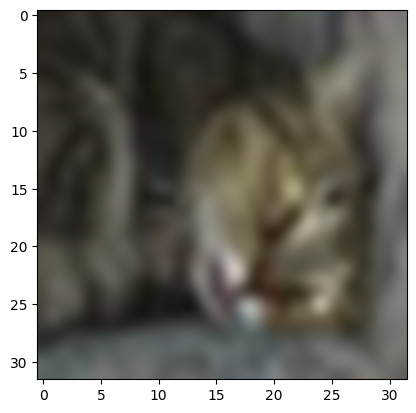

Stats of batch 2:
Label Counts of [0]Airplane: 933
Label Counts of [1]Automobile: 866
Label Counts of [2]Bird: 899
Label Counts of [3]Cat: 929
Label Counts of [4]Deer: 929
Label Counts of [5]Dog: 925
Label Counts of [6]Frog: 887
Label Counts of [7]Horse: 853
Label Counts of [8]Ship: 880
Label Counts of [9]Truck: 899

Stats of image at index [6421]:
Image shape: (32, 32, 3)
Image- Min Value:0.0, Max Value:255.0
Label- Label Id:8, Label Name:Ship 


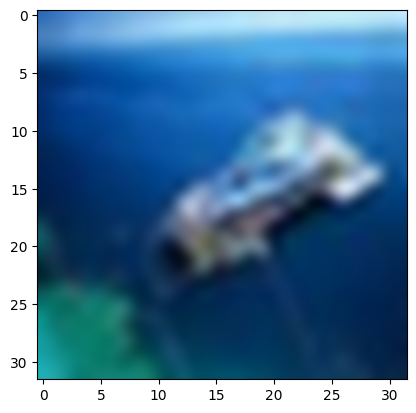

Stats of batch 3:
Label Counts of [0]Airplane: 894
Label Counts of [1]Automobile: 932
Label Counts of [2]Bird: 953
Label Counts of [3]Cat: 900
Label Counts of [4]Deer: 880
Label Counts of [5]Dog: 887
Label Counts of [6]Frog: 894
Label Counts of [7]Horse: 934
Label Counts of [8]Ship: 875
Label Counts of [9]Truck: 851

Stats of image at index [7562]:
Image shape: (32, 32, 3)
Image- Min Value:39.00000147521496, Max Value:210.00000268220901
Label- Label Id:4, Label Name:Deer 


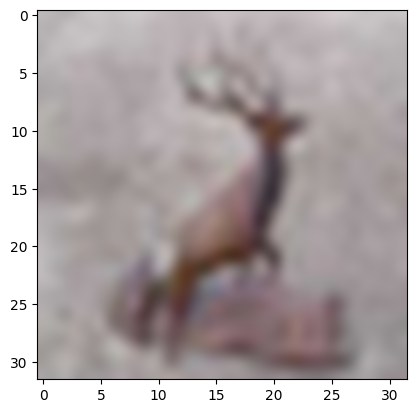

Stats of batch 4:
Label Counts of [0]Airplane: 893
Label Counts of [1]Automobile: 904
Label Counts of [2]Bird: 871
Label Counts of [3]Cat: 910
Label Counts of [4]Deer: 894
Label Counts of [5]Dog: 908
Label Counts of [6]Frog: 926
Label Counts of [7]Horse: 905
Label Counts of [8]Ship: 908
Label Counts of [9]Truck: 881

Stats of image at index [104]:
Image shape: (32, 32, 3)
Image- Min Value:19.0000007674098, Max Value:255.0
Label- Label Id:9, Label Name:Truck 


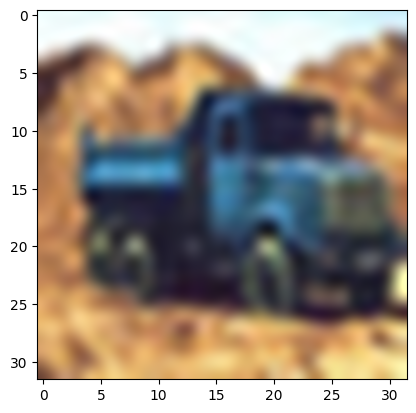

Stats of batch 5:
Label Counts of [0]Airplane: 834
Label Counts of [1]Automobile: 881
Label Counts of [2]Bird: 888
Label Counts of [3]Cat: 908
Label Counts of [4]Deer: 898
Label Counts of [5]Dog: 893
Label Counts of [6]Frog: 897
Label Counts of [7]Horse: 886
Label Counts of [8]Ship: 940
Label Counts of [9]Truck: 975

Stats of image at index [4616]:
Image shape: (32, 32, 3)
Image- Min Value:13.000000175088644, Max Value:255.0
Label- Label Id:8, Label Name:Ship 


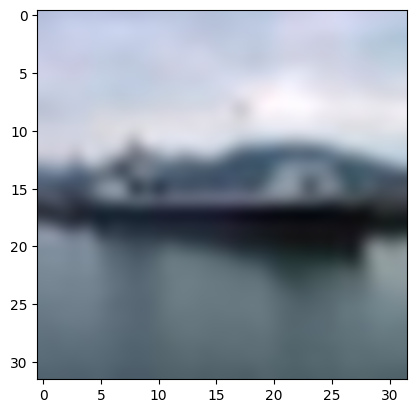

In [14]:
for i in range(1,6):
  print(f"Stats of batch {i}:")
  if(i==1):
    summary(train_l1,train_b1)
  elif(i==2):
    summary(train_l2,train_b2)
  elif(i==3):
    summary(train_l3,train_b3)
  elif(i==4):
    summary(train_l4,train_b4)
  elif(i==5):
    summary(train_l5,train_b5)

Stats of validation dataset:
Label Counts of [0]Airplane: 515
Label Counts of [1]Automobile: 476
Label Counts of [2]Bird: 500
Label Counts of [3]Cat: 497
Label Counts of [4]Deer: 486
Label Counts of [5]Dog: 518
Label Counts of [6]Frog: 490
Label Counts of [7]Horse: 471
Label Counts of [8]Ship: 519
Label Counts of [9]Truck: 528

Stats of image at index [3280]:
Image shape: (32, 32, 3)
Image- Min Value:5.000000176951289, Max Value:173.00000488758087
Label- Label Id:6, Label Name:Frog 


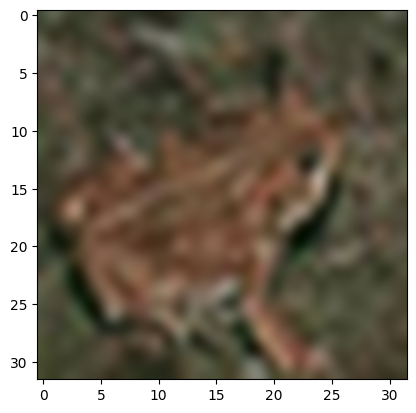

In [15]:
print("Stats of validation dataset:")
summary(valid_labels,valid_images)


## Bar plots
### To represent Class Distribution- will help to find out whether there are class imbalance issues and how frequencies of different classes are distributed relative to each other (whether all classes have more or less same number of images or the data has more images in few classes and less in others, i.e biased)


In [16]:
import pandas as pd
def barchartmaking(labelarray):
  data={"bins":[0,1,2,3,4,5,6,7,8,9],"frequency":[np.count_nonzero(labelarray==0),np.count_nonzero(labelarray==1),np.count_nonzero(labelarray==2),np.count_nonzero(labelarray==3),np.count_nonzero(labelarray==4),np.count_nonzero(labelarray==5),np.count_nonzero(labelarray==6),np.count_nonzero(labelarray==7),np.count_nonzero(labelarray==8),np.count_nonzero(labelarray==9)]}
  df=pd.DataFrame(data)
  colors = ['green','blue','purple','brown','teal','orange','red','gray','pink','indigo']
  plt.figure(figsize=(6, 4))
  plt.bar(df['bins'], df['frequency'], color=colors)
  plt.xticks(df['bins'])
  plt.title('Distribution of Images across Classes', fontsize=10)
  plt.xlabel('Classes/Categories', fontsize=8)
  plt.ylabel('Number of Images', fontsize=8)
  plt.grid(False)
  plt.show()






Barplot of batch 1


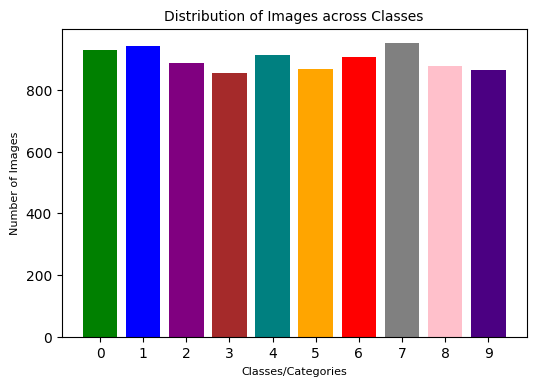

Barplot of batch 2


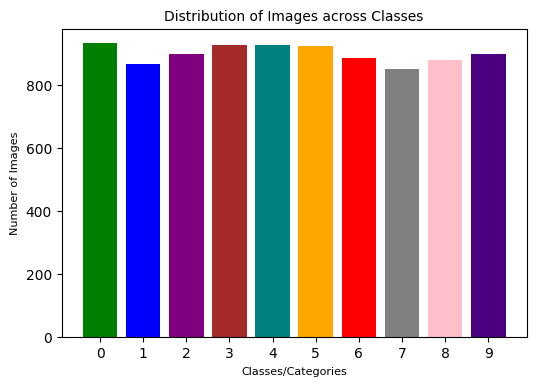

Barplot of batch 3


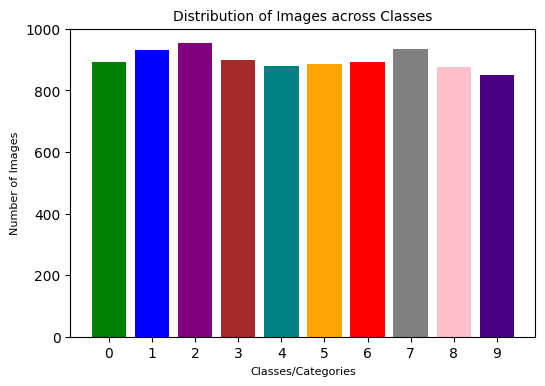

Barplot of batch 4


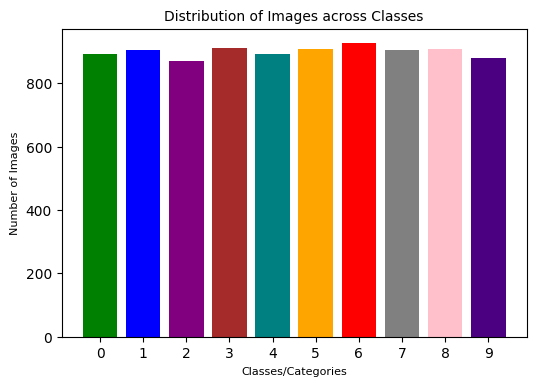

Barplot of batch 5


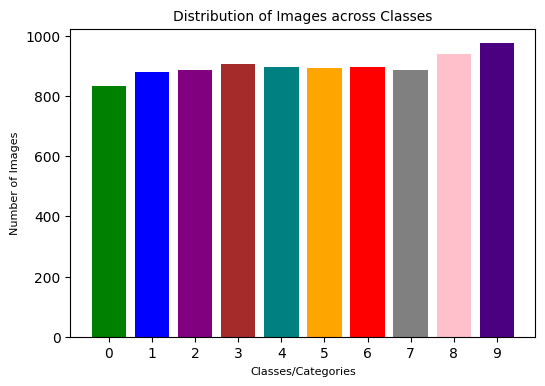

In [17]:
print("Barplot of batch 1")
barchartmaking(train_l1)
print("Barplot of batch 2")
barchartmaking(train_l2)
print("Barplot of batch 3")
barchartmaking(train_l3)
print("Barplot of batch 4")
barchartmaking(train_l4)
print("Barplot of batch 5")
barchartmaking(train_l5)

Barplot of validation set


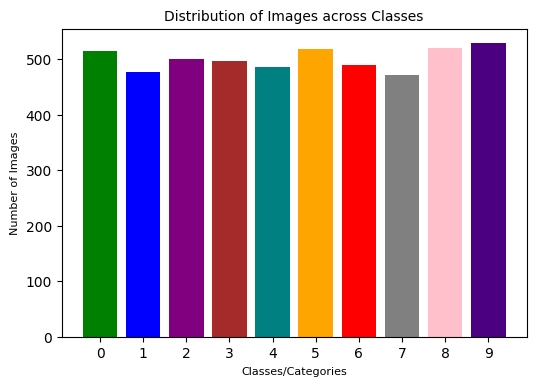

In [18]:
print("Barplot of validation set")
barchartmaking(valid_labels)

## Distribution of Colors (for each Class)

In [19]:

uniqueind=[]
uniqueimages=[]
for i in train_labels:
  if i not in uniqueind:
    uniqueind.append(i)
    uniqueimages.append(np.where(train_labels==i)[0][0])
def histmaker():
  plt.figure(figsize=(15,50))
  n=0
  for i in uniqueimages:
    plt.subplot(10,3,n+1)
    plt.hist(train_images[i].transpose(2,1,0).reshape(-1)[:1024])
    plt.title("red: " + labellist[train_labels[i]])
    n += 1

    plt.subplot(10,3,n+1)
    plt.hist(train_images[i].transpose(2,1,0).reshape(-1)[1024:2048])
    plt.title("green: " + labellist[train_labels[i]])
    n += 1

    plt.subplot(10,3,n+1)
    plt.hist(train_images[i].transpose(2,1,0).reshape(-1)[2048:])
    plt.title("blue: " + labellist[train_labels[i]])
    n += 1
  plt.show()


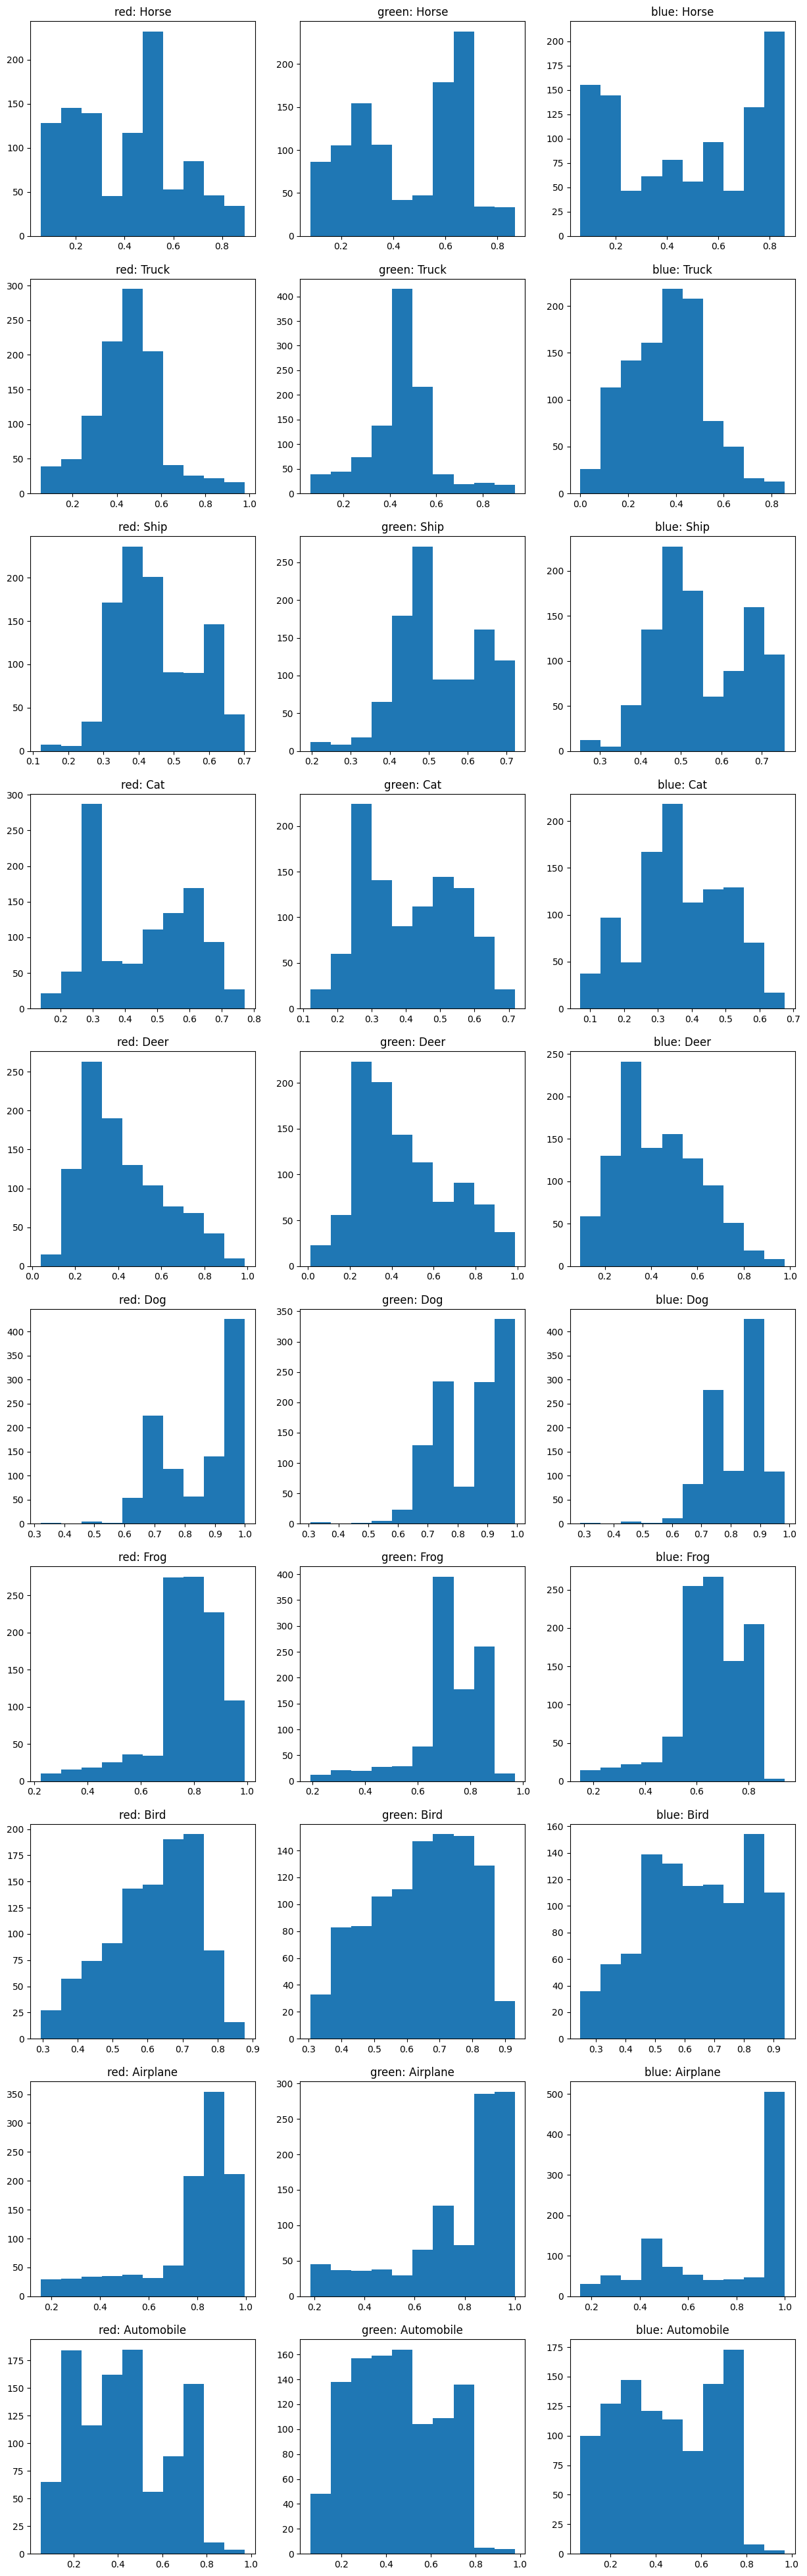

In [20]:
histmaker()

# Baseline Model

In [17]:
model2=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optim2=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model2.compile(optimizer=optim2, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
trainer2= model2.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
result2,accu2 = model2.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 7s 9ms/step - loss: 1.7649 - accuracy: 0.3617 - val_loss: 1.5040 - val_accuracy: 0.4644
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: 1.4100 - accuracy: 0.4970 - val_loss: 1.3356 - val_accuracy: 0.5234
Epoch 3/100
704/704 [==============================] - 5s 8ms/step - loss: 1.2501 - accuracy: 0.5612 - val_loss: 1.2211 - val_accuracy: 0.5830
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 1.1370 - accuracy: 0.6020 - val_loss: 1.1485 - val_accuracy: 0.5972
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.0425 - accuracy: 0.6355 - val_loss: 1.0718 - val_accuracy: 0.6322
Epoch 6/100
704/704 [==============================] - 9s 12ms/step - loss: 0.9686 - accuracy: 0.6610 - val_loss: 1.0326 - val_accuracy: 0.6434
Epoch 7/100
704/704 [==============================] - 10s 15ms/step - loss: 0.8979 - accuracy: 0.6878 - val_loss: 0.9731 - val_accuracy: 0.6

In [18]:
print(trainer2.history)

{'loss': [1.764887809753418, 1.4099655151367188, 1.250117301940918, 1.1370114088058472, 1.0425004959106445, 0.9685715436935425, 0.8978880047798157, 0.840177595615387, 0.7904258966445923, 0.7410425543785095, 0.690119743347168, 0.6423252820968628, 0.6009588837623596, 0.5525034070014954, 0.5044103264808655, 0.4584982097148895, 0.41429856419563293, 0.3703877031803131, 0.3258326053619385, 0.2850560247898102, 0.24404913187026978, 0.208375483751297, 0.17321829497814178, 0.1416672021150589, 0.12413426488637924, 0.09552840888500214, 0.06851144134998322, 0.049636539071798325, 0.03253718093037605, 0.022472543641924858, 0.013702935539186, 0.00822114385664463, 0.005818725563585758, 0.003872377797961235, 0.003579799784347415, 0.0026621869765222073, 0.002272707875818014, 0.0020013824105262756, 0.0018390381010249257, 0.0016171826282516122, 0.0014743299689143896, 0.0013675163500010967, 0.001260706689208746, 0.0011679421877488494, 0.001093418337404728, 0.0010346488561481237, 0.0009724069968797266, 0.000

In [19]:
print(f"Accuracy in classifying test set= {accu2:.3f}")
print(f"Jtest= {result2:.3f}")
baseline=0.278
print(f"Jbaseline= {baseline:.3f}")
print(f"Jtrain - Jbaseline= {(trainer2.history['loss'][-1]-baseline):.3f}")
print(f"Jtrain - Jcv= {(trainer2.history['loss'][-1]-trainer2.history['val_loss'][-1]):.3f}")

Accuracy in classifying test set= 0.696
Jtest= 3.057
Jbaseline= 0.278
Jtrain - Jbaseline= -0.278
Jtrain - Jcv= -2.959


In [22]:

def plotter(trainerid,resultid):
  xaxis=np.arange(1,101)
  fig,ax=plt.subplots(1,1,figsize=(12,4))
  ax.set_title('Cross Entropy Loss')
  ax.plot(xaxis,trainerid.history['loss'], color='blue', label='train')
  ax.plot(xaxis,trainerid.history['val_loss'], color='orange', label='validation')
  ax.axhline(y=baseline, color='green', linestyle='-')

  ax.legend()
  plt.show()
  print(f"Final model performance- Categorical Cross Entropy Loss on test dataset= {resultid:.3f}")



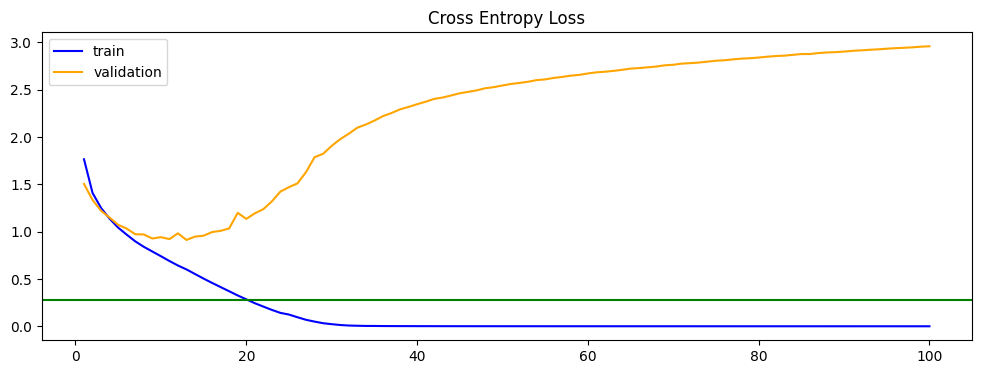

Final model performance- Categorical Cross Entropy Loss on test dataset= 3.057


In [23]:
plotter(trainer2,result2)

# Hyperparameter Tuning

## Hyperparameter 1: Training set size (Number of training examples)

In [37]:
def lc(size,lr):
  model2=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
  ])
  optim2=tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
  model2.compile(optimizer=optim2, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
  holder=np.random.default_rng()
  listofindicestrain=holder.choice(45000, size=size,replace=False,shuffle=False)
  listofindicesval=holder.choice(5000, size=int(((size/9000)*1000)),replace=False,shuffle=False)
  # trainer2= model2.fit(train_images[:size], final_labels_encoded[:size], epochs=10, batch_size=64, validation_data=(valid_images[:int(((size/9000)*1000))],valid_lfinal[:int(((size/9000)*1000))]), verbose=1)
  trainer2= model2.fit(np.take(train_images,listofindicestrain,0), np.take(final_labels_encoded,listofindicestrain,0), epochs=100, batch_size=64, validation_data=(np.take(valid_images,listofindicesval,0),np.take(valid_lfinal,listofindicesval,0)), verbose=1)
  _,result2 = model2.evaluate(test_images, test_labels_f, verbose=0)
  return trainer2,result2

In [38]:
trainlosslist=[]
cvlosslist=[]
testlosslist=[]
for i in range(9000,45001,9000):
  trainer21,result21=lc(i,0.001)
  trainlosslist.append(trainer21.history['loss'][-1])
  cvlosslist.append(trainer21.history['val_loss'][-1])
  testlosslist.append(result21)

Epoch 1/100
141/141 [==============================] - 2s 9ms/step - loss: 2.1242 - categorical_crossentropy: 2.1242 - val_loss: 1.9897 - val_categorical_crossentropy: 1.9897
Epoch 2/100
141/141 [==============================] - 1s 7ms/step - loss: 1.8758 - categorical_crossentropy: 1.8758 - val_loss: 1.8075 - val_categorical_crossentropy: 1.8075
Epoch 3/100
141/141 [==============================] - 1s 7ms/step - loss: 1.7298 - categorical_crossentropy: 1.7298 - val_loss: 1.6777 - val_categorical_crossentropy: 1.6777
Epoch 4/100
141/141 [==============================] - 1s 9ms/step - loss: 1.6183 - categorical_crossentropy: 1.6183 - val_loss: 1.5785 - val_categorical_crossentropy: 1.5785
Epoch 5/100
141/141 [==============================] - 1s 9ms/step - loss: 1.5097 - categorical_crossentropy: 1.5097 - val_loss: 1.5668 - val_categorical_crossentropy: 1.5668
Epoch 6/100
141/141 [==============================] - 1s 10ms/step - loss: 1.4370 - categorical_crossentropy: 1.4370 - val_l

Jtrain: [0.0005516209057532251, 0.00040336139500141144, 0.000292985700070858, 0.00023337817401625216, 0.0001821300684241578]
Jcv: [3.591818332672119, 3.413522958755493, 3.261286497116089, 3.058804988861084, 3.081286907196045]
Jtest: [3.811337947845459, 3.4793429374694824, 3.2199301719665527, 3.1727747917175293, 3.0933876037597656]


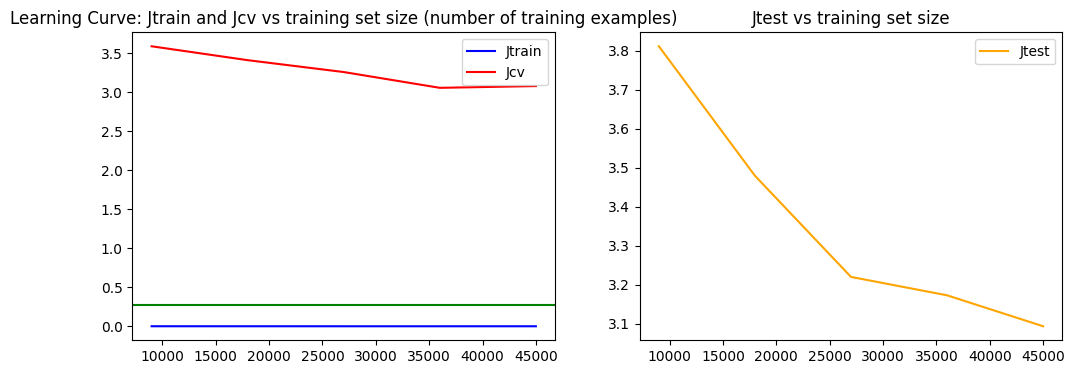

In [58]:
print(f"Jtrain: {trainlosslist}")
print(f"Jcv: {cvlosslist}")
print(f"Jtest: {testlosslist}")
xaxis=np.arange(9000,45001,9000)
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('Learning Curve: Jtrain and Jcv vs training set size (number of training examples)')
ax[0].plot(xaxis,trainlosslist,color="blue",label="Jtrain")
ax[0].plot(xaxis,cvlosslist,color="red",label="Jcv")
ax[0].axhline(y=0.278, color='green', linestyle='-')
ax[1].set_title('Jtest vs training set size')
ax[1].plot(xaxis,testlosslist,color="orange",label="Jtest")
ax[0].legend()
ax[1].legend()

plt.show()

## Hyperparameter 2: Learning Rate

In [54]:
o=0.001
trainlosslist2=[]
cvlosslist2=[]
testlosslist2=[]
while(o<11):
  trainer22,result22=lc(45000,o)
  trainlosslist2.append(trainer22.history['loss'][-1])
  cvlosslist2.append(trainer22.history['val_loss'][-1])
  testlosslist2.append(result22)
  o=o*10

Epoch 1/100
704/704 [==============================] - 9s 11ms/step - loss: 1.7706 - categorical_crossentropy: 1.7706 - val_loss: 1.5548 - val_categorical_crossentropy: 1.5548
Epoch 2/100
704/704 [==============================] - 5s 7ms/step - loss: 1.4236 - categorical_crossentropy: 1.4236 - val_loss: 1.3176 - val_categorical_crossentropy: 1.3176
Epoch 3/100
704/704 [==============================] - 7s 10ms/step - loss: 1.2602 - categorical_crossentropy: 1.2602 - val_loss: 1.2148 - val_categorical_crossentropy: 1.2148
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 1.1396 - categorical_crossentropy: 1.1396 - val_loss: 1.1858 - val_categorical_crossentropy: 1.1858
Epoch 5/100
704/704 [==============================] - 5s 8ms/step - loss: 1.0508 - categorical_crossentropy: 1.0508 - val_loss: 1.0772 - val_categorical_crossentropy: 1.0772
Epoch 6/100
704/704 [==============================] - 7s 10ms/step - loss: 0.9700 - categorical_crossentropy: 0.9700 - val

Jtrain: [0.00017424594261683524, 0.15971609950065613, 2.3062825202941895, nan, nan]
Jcv: [2.925419330596924, 4.689032554626465, 2.3126463890075684, nan, nan]
Jtest: [2.9565491676330566, 5.112039566040039, 2.310109853744507, nan, nan]


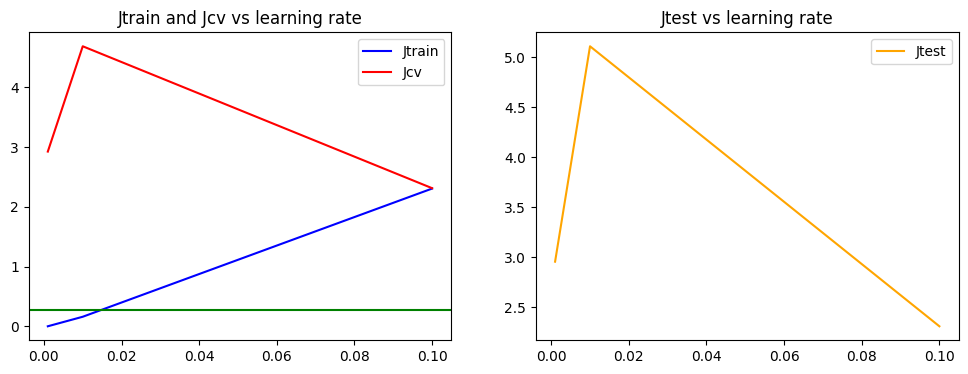

In [60]:
print(f"Jtrain: {trainlosslist2}")
print(f"Jcv: {cvlosslist2}")
print(f"Jtest: {testlosslist2}")
xaxis=[0.001,0.01,0.1,1,10]
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].set_title('Jtrain and Jcv vs learning rate')
ax[0].plot(xaxis,trainlosslist2,color="blue",label="Jtrain")
ax[0].plot(xaxis,cvlosslist2,color="red",label="Jcv")
ax[0].axhline(y=0.278, color='green', linestyle='-')
ax[1].set_title('Jtest vs learning rate')
ax[1].plot(xaxis,testlosslist2,color="orange",label="Jtest")
ax[0].legend()
ax[1].legend()
plt.show()

## Hyperparameter 3: Optimizers

In [ ]:
modelsgd=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimsgd=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelsgd.compile(optimizer=optimsgd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainersgd= modelsgd.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultsgd = modelsgd.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modelada=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimada=tf.keras.optimizers.Adadelta(learning_rate=0.001)
modelada.compile(optimizer=optimada, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerada= modelada.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultada = modelada.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/10
704/704 [==============================] - 7s 7ms/step - loss: 2.3503 - categorical_crossentropy: 2.3503 - val_loss: 2.2772 - val_categorical_crossentropy: 2.2772
Epoch 2/10
704/704 [==============================] - 5s 7ms/step - loss: 2.2408 - categorical_crossentropy: 2.2408 - val_loss: 2.2106 - val_categorical_crossentropy: 2.2106
Epoch 3/10
704/704 [==============================] - 5s 7ms/step - loss: 2.1781 - categorical_crossentropy: 2.1781 - val_loss: 2.1515 - val_categorical_crossentropy: 2.1515
Epoch 4/10
704/704 [==============================] - 5s 7ms/step - loss: 2.1208 - categorical_crossentropy: 2.1208 - val_loss: 2.0983 - val_categorical_crossentropy: 2.0983
Epoch 5/10
704/704 [==============================] - 5s 8ms/step - loss: 2.0690 - categorical_crossentropy: 2.0690 - val_loss: 2.0509 - val_categorical_crossentropy: 2.0509
Epoch 6/10
704/704 [==============================] - 5s 7ms/step - loss: 2.0212 - categorical_crossentropy: 2.0212 - val_loss: 2.

In [ ]:
modeladf=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadf=tf.keras.optimizers.Adafactor(learning_rate=0.001)
modeladf.compile(optimizer=optimadf, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradf= modeladf.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadf = modeladf.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modeladd=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadd=tf.keras.optimizers.Adagrad(learning_rate=0.001)
modeladd.compile(optimizer=optimadd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradd= modeladd.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadd = modeladd.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modeladm=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadm=tf.keras.optimizers.Adam(learning_rate=0.1)
modeladm.compile(optimizer=optimadm, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradm= modeladm.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadm = modeladm.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modeladw=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadw=tf.keras.optimizers.AdamW(learning_rate=0.001)
modeladw.compile(optimizer=optimadw, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradw= modeladw.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadw = modeladw.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modeladx=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimadx=tf.keras.optimizers.Adamax(learning_rate=0.001)
modeladx.compile(optimizer=optimadx, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
traineradx= modeladx.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultadx = modeladx.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modelftrl=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimftrl=tf.keras.optimizers.Ftrl(learning_rate=0.001)
modelftrl.compile(optimizer=optimftrl, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerftrl= modelftrl.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultftrl = modelftrl.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modellion=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimlion=tf.keras.optimizers.Adam(learning_rate=3e-4)
modellion.compile(optimizer=optimlion, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerlion= modellion.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultlion = modellion.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modelrms=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimrms=tf.keras.optimizers.RMSprop(learning_rate=0.001,momentum=0.9)
modelrms.compile(optimizer=optimrms, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerrms= modelrms.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultrms = modelrms.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
modelndm=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimndm=tf.keras.optimizers.Nadam(learning_rate=0.001)
modelndm.compile(optimizer=optimndm, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerndm= modelndm.fit(train_images, final_labels_encoded, epochs=10, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultndm = modelndm.evaluate(test_images, test_labels_f, verbose=0)

In [ ]:
# @title
def plotteropt(trainerid,resultid):
  xaxis=np.arange(1,3)
  fig,ax=plt.subplots(1,1,figsize=(12,4))
  ax.set_title('Cross Entropy Loss')
  ax.plot(xaxis,trainerid.history['loss'], color='blue', label='train')
  ax.plot(xaxis,trainerid.history['val_loss'], color='orange', label='validation')
  ax.axhline(y=0.283, color='green', linestyle='-')
  ax.legend()
  plt.show()
  print("Final model performance- Categorical Cross Entropy Loss on test dataset")
  print(f"{resultid:.3f}")

In [ ]:
print("SGD")
plotteropt(trainersgd,resultsgd)
print("Adam")
plotteropt(traineradm,resultadm)
print("Adamax")
plotteropt(traineradx,resultadx)
print("AdamW")
plotteropt(traineradw,resultadw)
print("Adagrad")
plotteropt(traineradd,resultadd)
print("Adadelta")
plotteropt(trainerada,resultada)
print("Adafactor")
plotteropt(traineradf,resultadf)
print("Ftrl")
plotteropt(trainerftrl,resultftrl)
print("Nadam")
plotteropt(trainerndm,resultndm)
print("Adam- with lower initial learning rate")
plotteropt(trainerlion,resultlion)
print("RMSprop")
plotteropt(trainerrms,resultrms)





## Hyperparameter 4: Number of Units in a Layer

In [59]:
modelunit=Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimunit=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelunit.compile(optimizer=optimunit, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerunit= modelunit.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultunit = modelunit.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 6s 6ms/step - loss: 1.8596 - categorical_crossentropy: 1.8596 - val_loss: 1.5850 - val_categorical_crossentropy: 1.5850
Epoch 2/100
704/704 [==============================] - 5s 6ms/step - loss: 1.5032 - categorical_crossentropy: 1.5032 - val_loss: 1.4310 - val_categorical_crossentropy: 1.4310
Epoch 3/100
704/704 [==============================] - 4s 6ms/step - loss: 1.3402 - categorical_crossentropy: 1.3402 - val_loss: 1.2882 - val_categorical_crossentropy: 1.2882
Epoch 4/100
704/704 [==============================] - 4s 6ms/step - loss: 1.2410 - categorical_crossentropy: 1.2410 - val_loss: 1.2389 - val_categorical_crossentropy: 1.2389
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.1599 - categorical_crossentropy: 1.1599 - val_loss: 1.1772 - val_categorical_crossentropy: 1.1772
Epoch 6/100
704/704 [==============================] - 4s 6ms/step - loss: 1.0920 - categorical_crossentropy: 1.0920 - val_lo

In [61]:
modelunit2=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimunit2=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelunit2.compile(optimizer=optimunit2, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerunit2= modelunit2.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultunit2 = modelunit2.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 6s 8ms/step - loss: 1.7796 - categorical_crossentropy: 1.7796 - val_loss: 1.5048 - val_categorical_crossentropy: 1.5048
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 1.3857 - categorical_crossentropy: 1.3857 - val_loss: 1.2767 - val_categorical_crossentropy: 1.2767
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 1.2069 - categorical_crossentropy: 1.2069 - val_loss: 1.1910 - val_categorical_crossentropy: 1.1910
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 1.0941 - categorical_crossentropy: 1.0941 - val_loss: 1.1132 - val_categorical_crossentropy: 1.1132
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.0040 - categorical_crossentropy: 1.0040 - val_loss: 1.0092 - val_categorical_crossentropy: 1.0092
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 0.9290 - categorical_crossentropy: 0.9290 - val_lo

In [62]:
modelunit3=Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimunit3=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelunit3.compile(optimizer=optimunit3, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainerunit3= modelunit3.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultunit3 = modelunit3.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 11s 13ms/step - loss: 1.7111 - categorical_crossentropy: 1.7111 - val_loss: 1.4946 - val_categorical_crossentropy: 1.4946
Epoch 2/100
704/704 [==============================] - 8s 11ms/step - loss: 1.3367 - categorical_crossentropy: 1.3367 - val_loss: 1.2350 - val_categorical_crossentropy: 1.2350
Epoch 3/100
704/704 [==============================] - 8s 12ms/step - loss: 1.1414 - categorical_crossentropy: 1.1414 - val_loss: 1.2216 - val_categorical_crossentropy: 1.2216
Epoch 4/100
704/704 [==============================] - 8s 12ms/step - loss: 1.0134 - categorical_crossentropy: 1.0134 - val_loss: 1.0355 - val_categorical_crossentropy: 1.0355
Epoch 5/100
704/704 [==============================] - 8s 12ms/step - loss: 0.9131 - categorical_crossentropy: 0.9131 - val_loss: 0.9785 - val_categorical_crossentropy: 0.9785
Epoch 6/100
704/704 [==============================] - 8s 11ms/step - loss: 0.8257 - categorical_crossentropy: 0.8257 -

In [69]:
def plotterunit(trainerid,resultid):
  xaxis=np.arange(1,101)
  fig,ax=plt.subplots(1,1,figsize=(12,4))
  ax.set_title('Cross Entropy Loss')
  ax.plot(xaxis,trainerid.history['loss'], color='blue', label='train')
  ax.plot(xaxis,trainerid.history['val_loss'], color='orange', label='validation')
  ax.axhline(y=0.278, color='green', linestyle='-')
  ax.legend()
  plt.show()
  print(f"Final model performance- Categorical Cross Entropy Loss on test dataset= {resultid:.3f}")

  baseline=0.278
  print(f"Jtrain - Jbaseline= {(trainerid.history['loss'][-1]-baseline):.3f}")
  print(f"Jtrain - Jcv= {(trainerid.history['loss'][-1]-trainerid.history['val_loss'][-1]):.3f}")


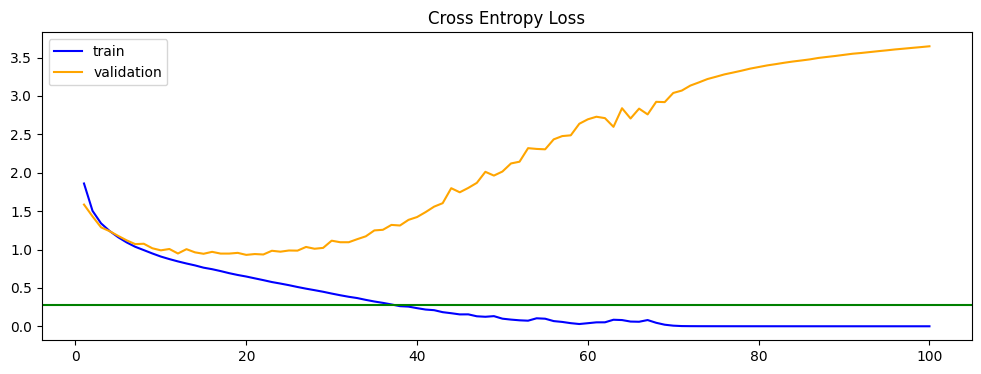

Final model performance- Categorical Cross Entropy Loss on test dataset= 3.816
Jtrain - Jbaseline= -0.278
Jtrain - Jcv= -3.646


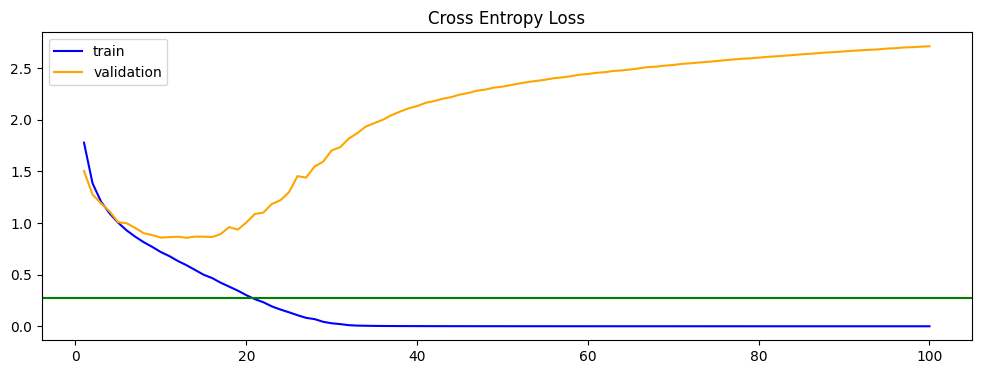

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.847
Jtrain - Jbaseline= -0.278
Jtrain - Jcv= -2.713


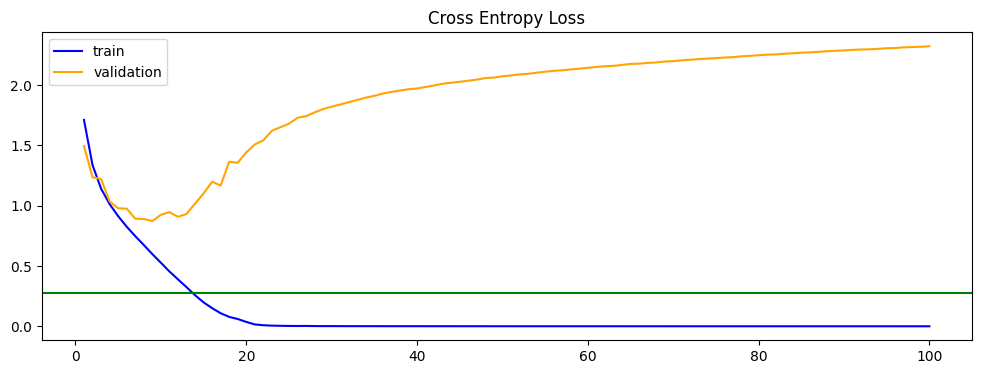

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.337
Jtrain - Jbaseline= -0.278
Jtrain - Jcv= -2.322


In [70]:


plotterunit(trainerunit,resultunit)
plotterunit(trainerunit2,resultunit2)
plotterunit(trainerunit3,resultunit3)

## Hyperparameter 5: Number of Layers (Depth of Model)

In [71]:
modelvggblock1=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimvggblock1=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelvggblock1.compile(optimizer=optimvggblock1, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainervggblock1= modelvggblock1.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultvggblock1 = modelvggblock1.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 5s 6ms/step - loss: 1.7613 - categorical_crossentropy: 1.7613 - val_loss: 1.5407 - val_categorical_crossentropy: 1.5407
Epoch 2/100
704/704 [==============================] - 4s 6ms/step - loss: 1.4430 - categorical_crossentropy: 1.4430 - val_loss: 1.3713 - val_categorical_crossentropy: 1.3713
Epoch 3/100
704/704 [==============================] - 4s 5ms/step - loss: 1.2892 - categorical_crossentropy: 1.2892 - val_loss: 1.2518 - val_categorical_crossentropy: 1.2518
Epoch 4/100
704/704 [==============================] - 4s 6ms/step - loss: 1.1786 - categorical_crossentropy: 1.1786 - val_loss: 1.2089 - val_categorical_crossentropy: 1.2089
Epoch 5/100
704/704 [==============================] - 4s 6ms/step - loss: 1.0955 - categorical_crossentropy: 1.0955 - val_loss: 1.1167 - val_categorical_crossentropy: 1.1167
Epoch 6/100
704/704 [==============================] - 4s 5ms/step - loss: 1.0244 - categorical_crossentropy: 1.0244 - val_lo

In [72]:
modelvggblock2=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimvggblock2=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelvggblock2.compile(optimizer=optimvggblock2, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainervggblock2= modelvggblock2.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultvggblock2 = modelvggblock2.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 7s 8ms/step - loss: 1.7352 - categorical_crossentropy: 1.7352 - val_loss: 1.5049 - val_categorical_crossentropy: 1.5049
Epoch 2/100
704/704 [==============================] - 5s 7ms/step - loss: 1.3937 - categorical_crossentropy: 1.3937 - val_loss: 1.3656 - val_categorical_crossentropy: 1.3656
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 1.2310 - categorical_crossentropy: 1.2310 - val_loss: 1.2348 - val_categorical_crossentropy: 1.2348
Epoch 4/100
704/704 [==============================] - 6s 8ms/step - loss: 1.1153 - categorical_crossentropy: 1.1153 - val_loss: 1.1014 - val_categorical_crossentropy: 1.1014
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.0141 - categorical_crossentropy: 1.0141 - val_loss: 1.0209 - val_categorical_crossentropy: 1.0209
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 0.9394 - categorical_crossentropy: 0.9394 - val_lo

In [73]:
modelvggblock3=Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10,activation='linear')
])
optimvggblock3=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
modelvggblock3.compile(optimizer=optimvggblock3, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True)])
trainervggblock3= modelvggblock3.fit(train_images, final_labels_encoded, epochs=100, batch_size=64, validation_data=(valid_images,valid_lfinal), verbose=1)
_, resultvggblock3 = modelvggblock3.evaluate(test_images, test_labels_f, verbose=0)

Epoch 1/100
704/704 [==============================] - 8s 9ms/step - loss: 1.7822 - categorical_crossentropy: 1.7822 - val_loss: 1.5896 - val_categorical_crossentropy: 1.5896
Epoch 2/100
704/704 [==============================] - 6s 8ms/step - loss: 1.4136 - categorical_crossentropy: 1.4136 - val_loss: 1.3217 - val_categorical_crossentropy: 1.3217
Epoch 3/100
704/704 [==============================] - 6s 9ms/step - loss: 1.2502 - categorical_crossentropy: 1.2502 - val_loss: 1.2746 - val_categorical_crossentropy: 1.2746
Epoch 4/100
704/704 [==============================] - 6s 8ms/step - loss: 1.1044 - categorical_crossentropy: 1.1044 - val_loss: 1.0876 - val_categorical_crossentropy: 1.0876
Epoch 5/100
704/704 [==============================] - 6s 9ms/step - loss: 1.0053 - categorical_crossentropy: 1.0053 - val_loss: 1.0341 - val_categorical_crossentropy: 1.0341
Epoch 6/100
704/704 [==============================] - 6s 8ms/step - loss: 0.9267 - categorical_crossentropy: 0.9267 - val_lo

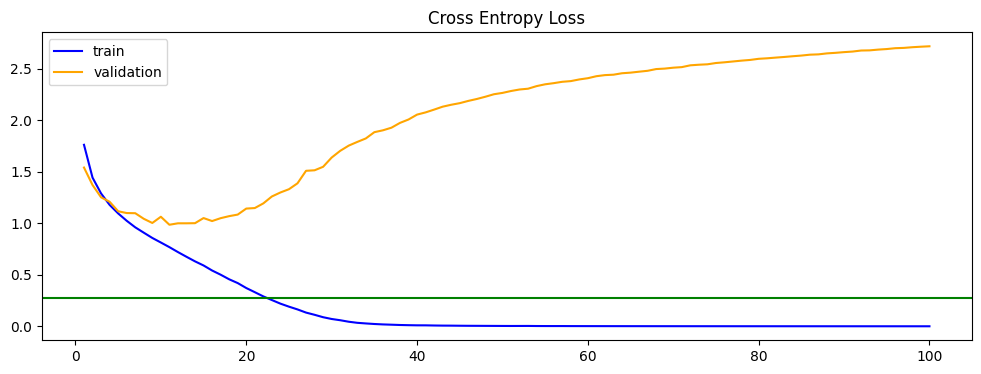

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.761
Jtrain - Jbaseline= -0.277
Jtrain - Jcv= -2.716


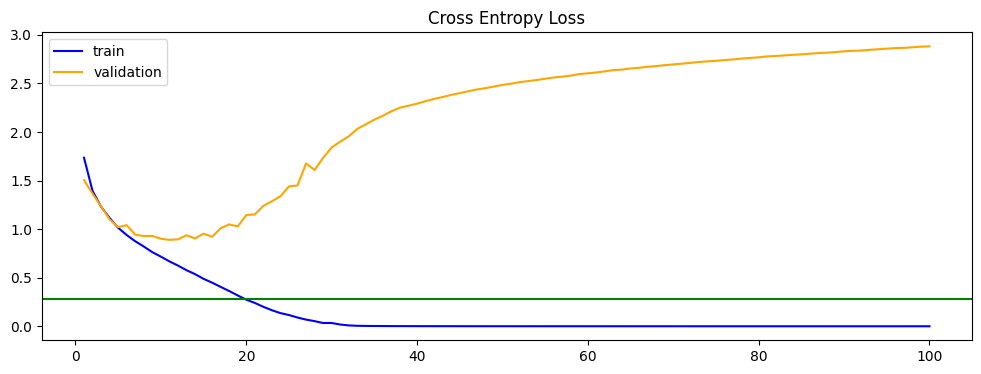

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.975
Jtrain - Jbaseline= -0.278
Jtrain - Jcv= -2.882


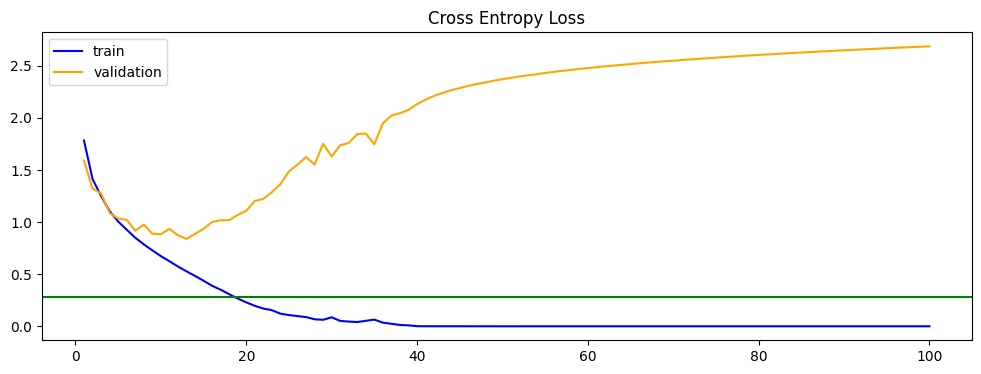

Final model performance- Categorical Cross Entropy Loss on test dataset= 2.807
Jtrain - Jbaseline= -0.278
Jtrain - Jcv= -2.687


In [74]:
plotterunit(trainervggblock1,resultvggblock1)
plotterunit(trainervggblock2,resultvggblock2)
plotterunit(trainervggblock3,resultvggblock3)